In [1]:
import numpy as np
from training_data import generate_stationary_agent_choices
from collections import Counter
import pandas as pd

In [2]:
from load_data import load_common_metadata
from outguesser import linear_choice_history_dependent_model

In [3]:
from outguesser import separate_choices_sequences_into_history_and_choice

from outguesser import momentum_gradient_descent, maximum_a_posteriori

In [4]:
from training_data import sigmoid

In [5]:
import seaborn as sns

In [6]:
sns.set_context("talk")

In [7]:
import matplotlib.pyplot as plt

In [8]:
data_dir = '../experiments/'
metadata = load_common_metadata(data_dir)

# Separate different experiments

In [9]:
no_feedback_experiments = pd.concat([metadata[metadata['ConfigFile']=="config/experiment1.json"], metadata[metadata['ConfigFile']=="config/experiment2.json"]])

feedback_choice_and_rewards_experiments = metadata[metadata['ConfigFile']=="config/experiment3.json"]

feedback_choices_experiments = metadata[metadata['ConfigFile']=="config/experiment4.json"]

# Bias and serial correlations

In [10]:
def get_model_params(expdataframe, weight_prior, optimizer):
    choices = pd.DataFrame.from_csv(data_dir + expdataframe['ChoicesFile']).values
    weights = optimizer(weight_prior, choices)
    return weights

In [11]:
history_length = 4
weight_prior = np.zeros((history_length+1))
optimizer = linear_choice_history_dependent_model


In [12]:
nf_params = np.array([get_model_params(exp, weight_prior, optimizer) for idx, exp in no_feedback_experiments.iterrows()])
fc_params = np.array([get_model_params(exp, weight_prior, optimizer) for idx, exp in feedback_choices_experiments.iterrows()])
fcr_params = np.array([get_model_params(exp, weight_prior, optimizer) for idx, exp in feedback_choice_and_rewards_experiments.iterrows()])

### Experiment without feedback

In [13]:
model_params = nf_params

In [14]:
bias_name = "no_feedback_bias.png"
weights_name = "no_feedback_weights.png"

In [15]:
mean_abs_weights = np.mean(np.abs(model_params), axis=0)

#### Bias

In [16]:
sns.set_context("talk")

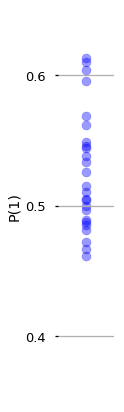

In [17]:
fig = plt.figure(figsize=(2,6))
ax_bias = fig.add_subplot(111)

ylabels = [0.4,0.5,0.6]

for model_param in model_params:
    ax_bias.scatter(1,sigmoid(1,model_param[0]), color='blue', alpha=0.4)

ax_bias.set_ylim(0.35,0.65)
ax_bias.yaxis.set_ticks(ylabels)
ax_bias.set_ylabel('P(1)')
ax_bias.grid(axis='y')
ax_bias.spines["top"].set_visible(False)
ax_bias.spines["right"].set_visible(False)
ax_bias.spines["left"].set_visible(False)
ax_bias.spines["bottom"].set_visible(False)

ax_bias.xaxis.set_visible(False)
plt.tight_layout()

In [18]:
fig.savefig(bias_name, dpi=300)

#### Weights

In [19]:
labels=["\huge$t_{{-{:d}}}$".format(i) for i in range(1,history_length+1)]

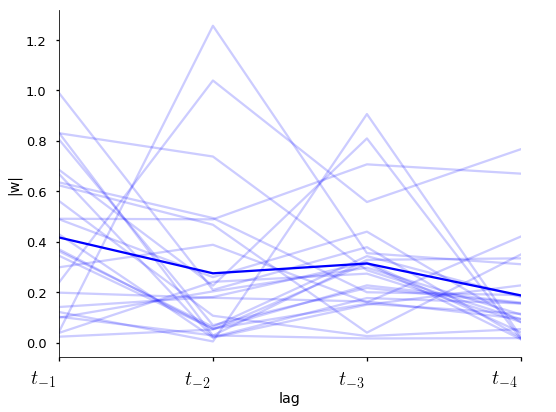

In [20]:
fig = plt.figure(figsize=(8,6))
ax_weights = fig.add_subplot(111)

for model_param in model_params:
    ax_weights.plot(list(range(len(model_param[1:]))), np.abs(model_param[1:]), color='blue', alpha=0.2)
    
ax_weights.plot(list(range(len(mean_abs_weights[1:]))), mean_abs_weights[1:], color='blue')    


ax_weights.xaxis.set_ticklabels(labels, usetex=True)
ax_weights.xaxis.set_ticks(range(history_length))
ax_weights.set_xlabel('lag')
ax_weights.set_ylabel('|w|')
ax_weights.set_xlim(0,history_length-1)
ax_weights.spines["right"].set_visible(False)
ax_weights.spines["top"].set_visible(False)


plt.tight_layout()

In [21]:
fig.savefig(weights_name, dpi=300)

### Experiment feedback choices

In [22]:
model_params = fc_params

In [23]:
bias_name = "feedback_choices_bias.png"
weights_name = "feedback_choices_weights.png"

In [24]:
mean_abs_weights = np.mean(np.abs(model_params), axis=0)

#### Bias

In [25]:
sns.set_context("talk")

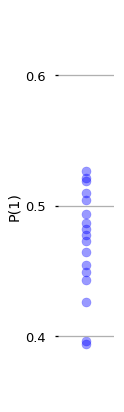

In [26]:
fig = plt.figure(figsize=(2,6))
ax_bias = fig.add_subplot(111)

ylabels = [0.4,0.5,0.6]

for model_param in model_params:
    ax_bias.scatter(1,sigmoid(1,model_param[0]), color='blue', alpha=0.4)

ax_bias.set_ylim(0.35,0.65)
ax_bias.yaxis.set_ticks(ylabels)
ax_bias.set_ylabel('P(1)')
ax_bias.grid(axis='y')
ax_bias.spines["top"].set_visible(False)
ax_bias.spines["right"].set_visible(False)
ax_bias.spines["left"].set_visible(False)
ax_bias.spines["bottom"].set_visible(False)

ax_bias.xaxis.set_visible(False)
plt.tight_layout()

In [27]:
fig.savefig(bias_name, dpi=300)

#### Weights

In [28]:
labels=["\huge$t_{{-{:d}}}$".format(i) for i in range(1,history_length+1)]

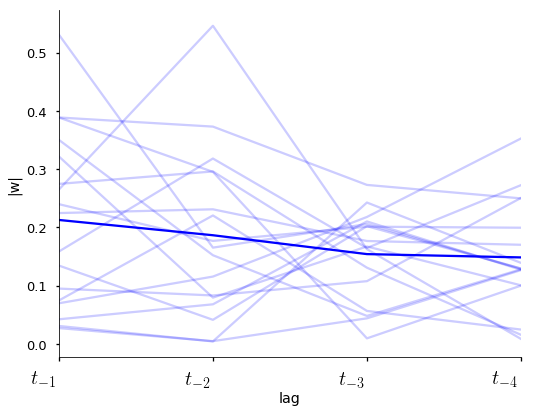

In [29]:
fig = plt.figure(figsize=(8,6))
ax_weights = fig.add_subplot(111)

for model_param in model_params:
    ax_weights.plot(list(range(len(model_param[1:]))), np.abs(model_param[1:]), color='blue', alpha=0.2)
    
ax_weights.plot(list(range(len(mean_abs_weights[1:]))), mean_abs_weights[1:], color='blue')    


ax_weights.xaxis.set_ticklabels(labels, usetex=True)
ax_weights.xaxis.set_ticks(range(history_length))
ax_weights.set_xlabel('lag')
ax_weights.set_ylabel('|w|')
ax_weights.set_xlim(0,history_length-1)
ax_weights.spines["right"].set_visible(False)
ax_weights.spines["top"].set_visible(False)


plt.tight_layout()

In [30]:
fig.savefig(weights_name, dpi=300)

### Experiment feedback choices and rewards

In [31]:
model_params = fcr_params

In [32]:
bias_name = "feedback_choices_and_rewards_bias.png"
weights_name = "feedback_choices_and_rewards_weights.png"

In [33]:
mean_abs_weights = np.mean(np.abs(model_params), axis=0)

#### Bias

In [34]:
sns.set_context("talk")

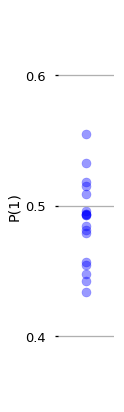

In [35]:
fig = plt.figure(figsize=(2,6))
ax_bias = fig.add_subplot(111)

ylabels = [0.4,0.5,0.6]

for model_param in model_params:
    ax_bias.scatter(1,sigmoid(1,model_param[0]), color='blue', alpha=0.4)

ax_bias.set_ylim(0.35,0.65)
ax_bias.yaxis.set_ticks(ylabels)
ax_bias.set_ylabel('P(1)')
ax_bias.grid(axis='y')
ax_bias.spines["top"].set_visible(False)
ax_bias.spines["right"].set_visible(False)
ax_bias.spines["left"].set_visible(False)
ax_bias.spines["bottom"].set_visible(False)

ax_bias.xaxis.set_visible(False)
plt.tight_layout()

In [36]:
fig.savefig(bias_name, dpi=300)

#### Weights

In [37]:
labels=["\huge$t_{{-{:d}}}$".format(i) for i in range(1,history_length+1)]

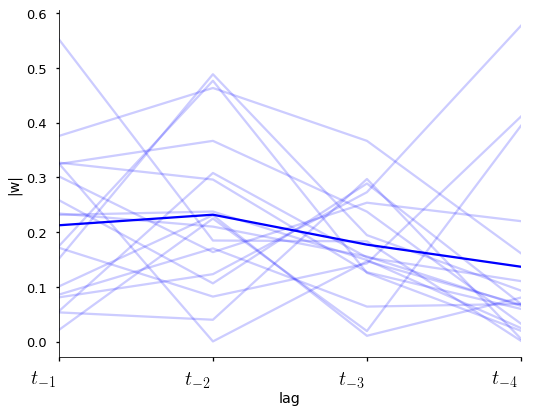

In [38]:
fig = plt.figure(figsize=(8,6))
ax_weights = fig.add_subplot(111)

for model_param in model_params:
    ax_weights.plot(list(range(len(model_param[1:]))), np.abs(model_param[1:]), color='blue', alpha=0.2)
    
ax_weights.plot(list(range(len(mean_abs_weights[1:]))), mean_abs_weights[1:], color='blue')    


ax_weights.xaxis.set_ticklabels(labels, usetex=True)
ax_weights.xaxis.set_ticks(range(history_length))
ax_weights.set_xlabel('lag')
ax_weights.set_ylabel('|w|')
ax_weights.set_xlim(0,history_length-1)
ax_weights.spines["right"].set_visible(False)
ax_weights.spines["top"].set_visible(False)


plt.tight_layout()

In [39]:
fig.savefig(weights_name, dpi=300)

## Compare experiments

In [40]:
params = [nf_params, fc_params, fcr_params]

In [41]:
colors = ['blue', 'orange', 'red']

#### Bias

In [42]:
sns.set_context("talk")

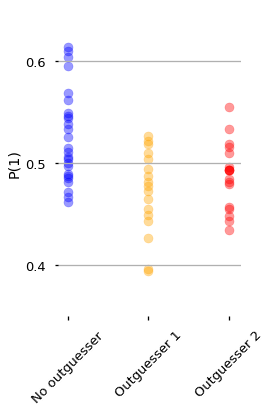

In [43]:
fig = plt.figure(figsize=(4,6))
ax_bias = fig.add_subplot(111)

xlabels=['No outguesser', 'Outguesser 1', 'Outguesser 2']
ylabels = [0.4,0.5,0.6]

for idx, model_params in enumerate(params):
    for model_param in model_params:
        ax_bias.scatter(idx,sigmoid(1,model_param[0]), color=colors[idx], alpha=0.4)

ax_bias.set_ylim(0.35,0.65)
ax_bias.xaxis.set_ticks(range(3))
ax_bias.xaxis.set_ticklabels(xlabels, rotation=45)
ax_bias.yaxis.set_ticks(ylabels)
ax_bias.set_ylabel('P(1)')
ax_bias.grid(axis='y')
ax_bias.spines["top"].set_visible(False)
ax_bias.spines["right"].set_visible(False)
ax_bias.spines["left"].set_visible(False)
ax_bias.spines["bottom"].set_visible(False)

plt.tight_layout()

In [44]:
fig.savefig("compare_bias_across_experiments.png", dpi=300)

#### Weights

In [45]:
labels=["\huge$t_{{-{:d}}}$".format(i) for i in range(1,history_length+1)]

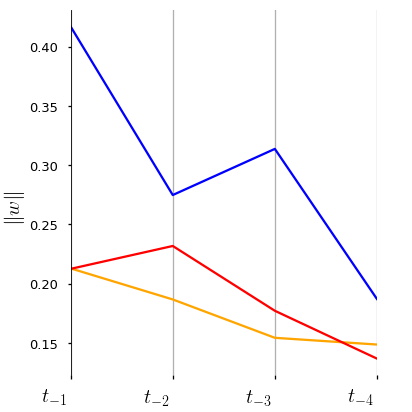

In [57]:
fig = plt.figure(figsize=(6,6))
ax_weights = fig.add_subplot(111)

for idx, model_params in enumerate(params):
    mean_abs_weights = np.mean(np.abs(model_params), axis=0)
    ax_weights.plot(list(range(len(mean_abs_weights[1:]))), mean_abs_weights[1:], color=colors[idx])    


ax_weights.xaxis.set_ticklabels(labels, usetex=True)
ax_weights.xaxis.set_ticks(range(history_length))
ax_weights.set_xlim(0,history_length-1)

ax_weights.grid(axis='x')
ax_weights.set_ylabel('\huge$\|w\|$', usetex=True)

ax_weights.spines["right"].set_visible(False)
ax_weights.spines["top"].set_visible(False)
ax_weights.spines["bottom"].set_visible(False)
ax_weights.spines["top"].set_visible(False)


plt.tight_layout()

In [47]:
fig.savefig("compare_weights_across_experiments", dpi=300)

Explore relation

non linear features
Laplace